In [2]:
import pandas as pd
import numpy as np
import csv
import string
import streamlit as st
import mysql.connector

In [4]:
# calculate the consumption_pp level deviation
def consumption_pp_level_deviation(merchant):
    Total = 0
    Count = 0
    consumption_pp = merchant['average_consumption(¥)']
    consumption_pp = consumption_pp.fillna(0)
    # for i in range(consumption_pp.shape[0]):
    #     if consumption_pp[i] != 0:
    #         consumption_pp[i] = int(consumption_pp[i][4:])
    #     else:
    #         consumption_pp[i] = int(consumption_pp[i])
    for num in consumption_pp:
        Count += 1
        Total += num
    Average = Total / Count
    for i in range(consumption_pp.shape[0]):
        if consumption_pp[i] == 0:
            consumption_pp[i] = Average
    return Average

def recalculate_cpp(merchant):
    deviation = []
    average = consumption_pp_level_deviation(merchant)
    consumption_pp = merchant['average_consumption(¥)']
    consumption_pp = consumption_pp.fillna(0)
    for i in range(merchant.shape[0]):
        # if consumption_pp[i] != 0:
        #     cpp_i = int(consumption_pp[i][4:])
        # else:
        #     cpp_i = consumption_pp[i]
        cpp_i = int(consumption_pp[i])
        d = (cpp_i - average) / average
        d = round(d,4)
        deviation.append(d)
    return deviation

In [7]:
def Bayesranking(merchant):
    rank = []
    N = 0 #number of all the ratings
    R = 0 #average of all the rating
    Count = 0
    num_comment = merchant['monthly_sale(¥)']
    num_comment = num_comment.fillna(0)
    for num in num_comment:
        N += num
    # for i in range(num_comment.shape[0]):
    #     num_comment[i] = num_comment[i][2:]
    #     if num_comment[i][-1] == '+':
    #         num_comment[i] = (num_comment[i][:-1])
    #         num_comment[i] = int(num_comment[i])
    #         N += num_comment[i]
    #     else:
    #         num_comment[i] = int(num_comment[i])
    r = merchant['m_rank(0_to_5)']
    for num in r:
        R += num
        Count += 1
    R /= Count
    len = merchant.shape[0]
    for i in range(len):
        t_rank = int(merchant['m_rank(0_to_5)'][i])
        n_i = num_comment[i]
        numerator = N*R + t_rank*n_i
        denominator = N + n_i
        rank_i = numerator / denominator
        rank_i = round(rank_i,4)
        rank.append(rank_i)
    return rank


In [11]:
filename = ['1-烧烤的','2-火锅的','3-奶茶','4-肠粉','5-炒饭','6-早餐','7-宵夜','8-炸鸡']
for i in filename:
    address = 'dataset/' + i + '.csv'
    file_name = i + '_ready.csv'
    file_to_read = pd.read_csv(address)
    Bayes_rank_name = Bayesranking(file_to_read)
    Cpp_deviation = recalculate_cpp(file_to_read)
    consumption_pp = file_to_read['average_consumption(¥)']
    consumption_pp = consumption_pp.fillna(0)
    for i in range(consumption_pp.shape[0]):
        if consumption_pp[i] != 0:
            continue
        else:
            consumption_pp[i] = consumption_pp_level_deviation(file_to_read)
    distance = file_to_read['distance(m)']
    distance = distance.fillna(0)
    # for i in range(distance.shape[0]):
    #     distance[i] = (distance[i][:-2])
    with open(file_name,'w',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["m_id","distance","consumption_pp","bayesranking","number_discounts ","consumption_pp_deviation"])
        for i in range(file_to_read.shape[0]):
            writer.writerow([i,distance[i],consumption_pp[i],Bayes_rank_name[i],file_to_read['type_of_package'][i],Cpp_deviation[i]])

    

In [210]:
import matplotlib.pyplot as plt

C:\Users\H-X-J\AppData\Local\Temp\ipykernel_39428\1903834381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[i] = 0
C:\Users\H-X-J\AppData\Local\Temp\ipykernel_39428\1903834381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[i] = 0
C:\Users\H-X-J\AppData\Local\Temp\ipykernel_39428\1903834381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[i] = 0
C:\Users\H-X-J\AppData\Local\Temp\ipykernel_39428\1903834381.py:10: Se

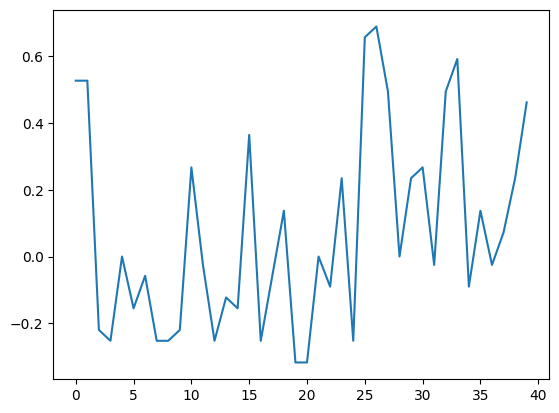

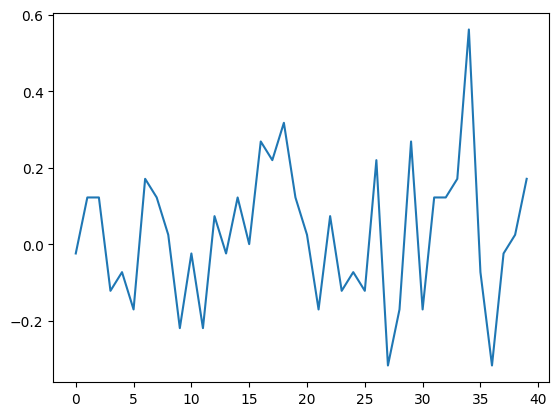

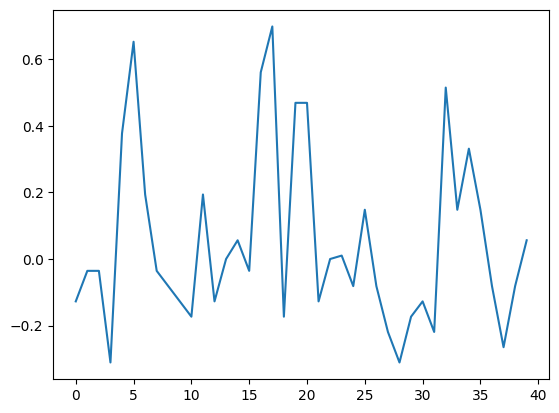

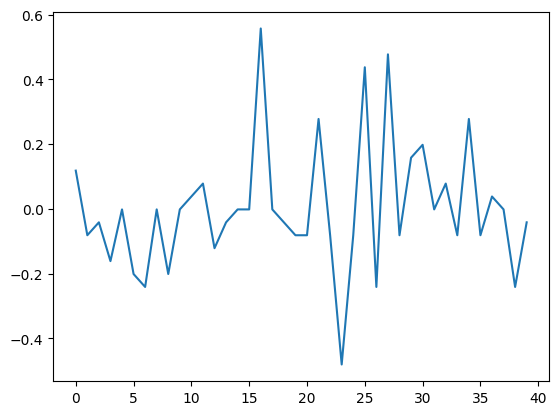

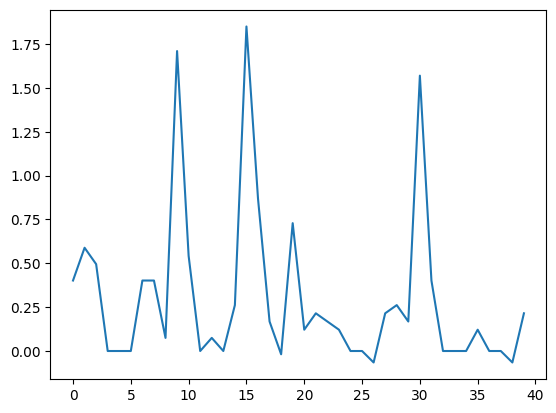

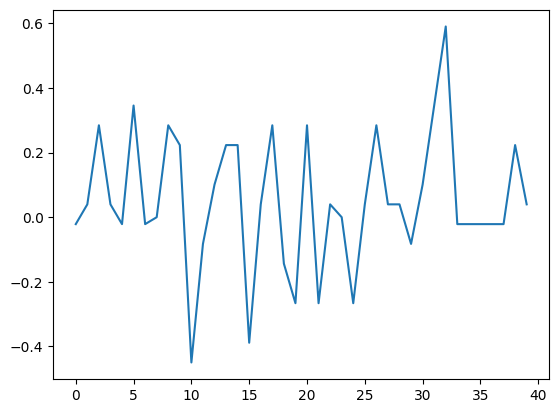

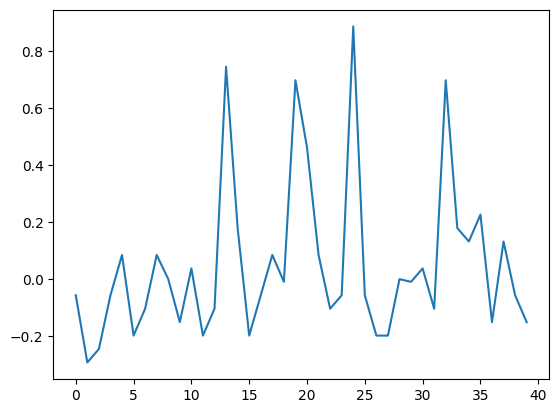

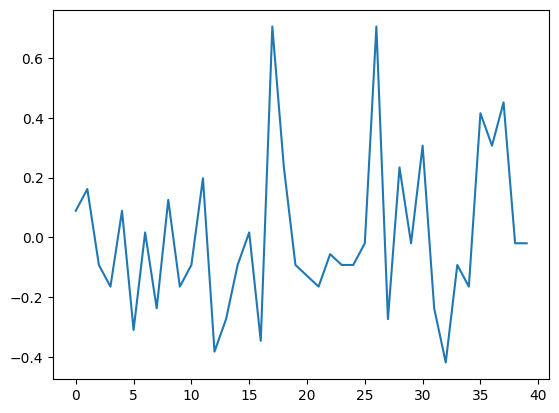

In [236]:
filename = ['bbq','breakfast','fried_rice','fried_chicken','hotpot','milk_tea','rice_roll','supper']
for i in filename:
    address = i + '_ready.csv'
    file_to_read = pd.read_csv(address)

    X = range(40)
    Y = file_to_read['consumption_pp_deviation']
    for i in range(Y.size):
        if  Y[i] == -1:
            Y[i] = 0
    plt.figure()
    plt.plot(X,Y)